Olive Ridley Survival Optimizer code based on the base paper

In [ ]:
import numpy as np

class OliveRidleySurvivalOptimizer:
    def __init__(self, objective_function, num_turtles=30, dimensions=2, lower_bound=-5, upper_bound=5,
                 max_iterations=100, tolerable_temp=28, max_temp=35, time_range=(6, 18)):
        self.obj_func = objective_function
        self.num_turtles = num_turtles
        self.dimensions = dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iterations = max_iterations

        # Initialize turtle positions and velocities
        self.turtles = np.random.uniform(lower_bound, upper_bound, (num_turtles, dimensions))
        self.turtles=np.array(self.turtles,dtype=np.float64)
        self.velocities = np.random.uniform(-1, 1, (num_turtles, dimensions))  # Initial velocity
        self.velocities=np.array(self.velocities,dtype=np.float64)

        self.best_turtle = None
        self.best_fitness = float("inf")

        # Biological parameters
        self.sand_temperature = np.random.uniform(25, 38, num_turtles)  # Random temp between 25°C and 38°C
        self.sand_temperature=np.array(self.sand_temperature,dtype=np.float64)
        self.time_of_day = np.random.uniform(0, 24, num_turtles)  # Time in hours (0 to 24)
        self.time_of_day=np.array(self.time_of_day,dtype=np.float64)

        # Emergence types (early: +1, middle: 0, late: -1)
        self.emergence_types = np.random.choice([-1, 0, 1], num_turtles)
        self.emergence_types=np.array(self.emergence_types,dtype=np.float64)

        # Constants
        self.tolerable_temp = tolerable_temp
        self.max_temp = max_temp
        self.time_range = time_range  # (start_time, end_time)

    def temperature_impact(self, temp):
        """ Adjust speed based on temperature conditions """
        if temp < self.tolerable_temp:
            return 1 + np.exp(-0.1 * (self.tolerable_temp - temp))  # Speed increases
        elif self.tolerable_temp <= temp <= self.max_temp:
            return np.exp(-0.1 * (temp - self.tolerable_temp))  # Speed decreases
        else:
            return -np.inf  # Turtle dies

    def time_of_day_impact(self, time):
        """ Speed impact based on time of day """
        return 1.5 if self.time_range[0] <= time <= self.time_range[1] else 0.5

    def emergence_impact(self, emergence_type):
        """ Speed impact based on emergence order """
        return emergence_type  # Early (+1), Middle (0), Late (-1)

    def optimize(self):
        for iteration in range(self.max_iterations):
            fitness_values = np.apply_along_axis(self.obj_func, 1, self.turtles)

            # Update best solution found
            min_index = np.argmin(fitness_values)
            if fitness_values[min_index] < self.best_fitness:
                self.best_fitness = fitness_values[min_index]
                self.best_turtle = self.turtles[min_index].copy()

            # --- Exploration: Change in movement trajectory ---
            random_factor = np.random.uniform(0, 1, (self.num_turtles, self.dimensions))
            movement_direction = np.sign(np.random.uniform(-1, 1, (self.num_turtles, self.dimensions)))
            exploration_step = (1 - iteration / self.max_iterations) * movement_direction * random_factor
            self.turtles += exploration_step

            # --- Exploitation: Calculate velocity change ---
            new_velocities = np.zeros((self.num_turtles, self.dimensions))

            for i in range(self.num_turtles):
                temp_factor = np.float64(self.temperature_impact(self.sand_temperature[i]))
                time_factor = np.float64(self.time_of_day_impact(self.time_of_day[i]))
                efk=np.random.rand()
                emergence_factor = np.float64(self.emergence_impact(self.emergence_types[i])*efk)

                if temp_factor == -np.inf:  # Turtle dies, remove it
                    fitness_values[i] = np.inf
                    continue

                # Calculate change in velocity for each factor separately
                velocity_change_temp = np.float64(np.float64(self.velocities[i]) * np.float64(temp_factor))
                velocity_change_time = np.float64(np.float64(self.velocities[i]) * np.float64(time_factor))
                velocity_change_emergence = emergence_factor

                # Sum up to get the final velocity change
                new_velocities[i] = np.float64(velocity_change_temp + velocity_change_time + velocity_change_emergence)

            # Update positions based on new velocities
            self.velocities = new_velocities
            self.turtles += self.velocities

            # Ensure turtles stay within bounds
            self.turtles = np.clip(self.turtles, self.lower_bound, self.upper_bound)

            if ((iteration+1)%100==0):
               print(f"Iteration {iteration+1}, Best Fitness: {self.best_fitness}")

        return self.best_turtle, self.best_fitness

# Example Usage
def sphere_function(x):
    return np.sum(x**2)  # Sphere function (min at x = 0)

# Run ORSO
for i in range(5):
  orso = OliveRidleySurvivalOptimizer(objective_function=sphere_function, dimensions=5, max_iterations=500)
  best_solution, best_fitness = orso.optimize()
  print("\nBest Solution:", best_solution)
  print("Best Fitness:", best_fitness)
  print()

Iteration 100, Best Fitness: 2.3662830162697004
Iteration 200, Best Fitness: 2.3662830162697004
Iteration 300, Best Fitness: 2.3662830162697004
Iteration 400, Best Fitness: 2.3662830162697004
Iteration 500, Best Fitness: 2.3662830162697004

Best Solution: [ 0.65992088 -0.00950264  0.71581274  0.31473999 -1.14858522]
Best Fitness: 2.3662830162697004

Iteration 100, Best Fitness: 6.1582434543872475
Iteration 200, Best Fitness: 6.1582434543872475
Iteration 300, Best Fitness: 6.1582434543872475
Iteration 400, Best Fitness: 6.1582434543872475
Iteration 500, Best Fitness: 6.1582434543872475

Best Solution: [ 0.59660102 -0.44951186 -0.8119812  -1.10835194 -1.92678288]
Best Fitness: 6.1582434543872475

Iteration 100, Best Fitness: 7.609961821346505
Iteration 200, Best Fitness: 7.609961821346505
Iteration 300, Best Fitness: 7.609961821346505
Iteration 400, Best Fitness: 7.609961821346505
Iteration 500, Best Fitness: 7.609961821346505

Best Solution: [-1.2811897  -0.99473339 -1.60118799 -1.51810

Code optimized with implementing adaptation with alpha and beta to balance exploration and exploitation

In [ ]:
import numpy as np

class OliveRidleySurvivalOptimizer:
    def __init__(self, objective_function, num_turtles=30, dimensions=2, lower_bound=-5, upper_bound=5,
                 max_iterations=100, tolerable_temp=28, max_temp=35, time_range=(6, 18), beta=0.5, learning_rate=0.1):
        self.obj_func = objective_function
        self.num_turtles = num_turtles
        self.dimensions = dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iterations = max_iterations

        # Adaptive Beta
        self.beta = beta
        self.learning_rate = learning_rate

        # Initialize turtle positions and velocities
        self.turtles = np.random.uniform(lower_bound, upper_bound, (num_turtles, dimensions)).astype(np.float64)
        self.velocities = np.random.uniform(-1, 1, (num_turtles, dimensions)).astype(np.float64)

        self.best_turtle = None
        self.best_fitness = float("inf")

        # Biological parameters
        self.sand_temperature = np.random.uniform(25, 38, num_turtles).astype(np.float64)
        self.time_of_day = np.random.uniform(0, 24, num_turtles).astype(np.float64)
        self.emergence_types = np.random.choice([-1, 0, 1], num_turtles).astype(np.float64)

        self.tolerable_temp = tolerable_temp
        self.max_temp = max_temp
        self.time_range = time_range

    def temperature_impact(self, temp):
        if temp < self.tolerable_temp:
            return 1 + np.exp(-0.1 * (self.tolerable_temp - temp))
        elif self.tolerable_temp <= temp <= self.max_temp:
            return np.exp(-0.1 * (temp - self.tolerable_temp))
        else:
            return -np.inf

    def time_of_day_impact(self, time):
        return 1.5 if self.time_range[0] <= time <= self.time_range[1] else 0.5

    def emergence_impact(self, emergence_type):
        return emergence_type

    def optimize(self):
        convergence=[]
        for iteration in range(self.max_iterations):
            fitness_values = np.apply_along_axis(self.obj_func, 1, self.turtles)

            min_index = np.argmin(fitness_values)
            if fitness_values[min_index] < self.best_fitness:
                self.best_fitness = fitness_values[min_index]
                self.best_turtle = self.turtles[min_index].copy()
            convergence.append(self.best_fitness)

            random_factor = np.random.uniform(0, 1, (self.num_turtles, self.dimensions))
            movement_direction = np.sign(np.random.uniform(-1, 1, (self.num_turtles, self.dimensions)))
            exploration_step = (1 - self.beta) * movement_direction * random_factor
            self.turtles += exploration_step

            new_velocities = np.zeros((self.num_turtles, self.dimensions))

            for i in range(self.num_turtles):
                temp_factor = self.temperature_impact(self.sand_temperature[i])
                time_factor = self.time_of_day_impact(self.time_of_day[i])
                emergence_factor = self.emergence_impact(self.emergence_types[i])

                if temp_factor == -np.inf:
                    fitness_values[i] = np.inf
                    continue

                velocity_change_temp = self.velocities[i] * temp_factor
                velocity_change_time = self.velocities[i] * time_factor
                velocity_change_emergence = self.velocities[i] * emergence_factor

                #new_velocities[i] = (self.beta * (velocity_change_temp + velocity_change_time) + (0.5+0.5*(1 - self.beta)) * velocity_change_emergence)
                new_velocities[i] = (self.beta * (velocity_change_temp + velocity_change_time) + (self.beta) * velocity_change_emergence)

            self.velocities = new_velocities
            self.turtles += self.velocities
            self.turtles = np.clip(self.turtles, self.lower_bound, self.upper_bound)

            improvement_rate = abs(self.best_fitness - np.min(fitness_values)) / (abs(self.best_fitness) + 1e-8)
            self.beta = max(0.1, min(0.9, self.beta * (1 - self.learning_rate * improvement_rate)))

            if (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}, Best Fitness: {self.best_fitness}, Beta: {self.beta:.2f}")

        return self.best_turtle, self.best_fitness,convergence


def sphere_function(x):
    return np.sum(x**2)  # Sphere function (min at x = 0)


# Run ORSO
convfull=[]
for i in range(5):
  orso = OliveRidleySurvivalOptimizer(objective_function=sphere_function, dimensions=5, max_iterations=500)
  best_solution, best_fitness,convergence = orso.optimize()
  print("\nBest Solution:", best_solution)
  print("Best Fitness:", best_fitness)
  convfull.append(convergence)
  print()


Iteration 100, Best Fitness: 1.769648889700983, Beta: 0.10
Iteration 200, Best Fitness: 1.769648889700983, Beta: 0.10
Iteration 300, Best Fitness: 1.769648889700983, Beta: 0.10
Iteration 400, Best Fitness: 1.769648889700983, Beta: 0.10
Iteration 500, Best Fitness: 1.769648889700983, Beta: 0.10

Best Solution: [-0.63149162 -0.31600673 -0.88853837  0.67322917 -0.1681339 ]
Best Fitness: 1.769648889700983

Iteration 100, Best Fitness: 4.515272315146561, Beta: 0.10
Iteration 200, Best Fitness: 1.588870376764128, Beta: 0.10
Iteration 300, Best Fitness: 1.588870376764128, Beta: 0.10
Iteration 400, Best Fitness: 1.588870376764128, Beta: 0.10
Iteration 500, Best Fitness: 0.7626565754771207, Beta: 0.10

Best Solution: [-0.29059835 -0.408838    0.68478452  0.12324373  0.16413963]
Best Fitness: 0.7626565754771207

Iteration 100, Best Fitness: 2.895890475697663, Beta: 0.10
Iteration 200, Best Fitness: 2.895890475697663, Beta: 0.10
Iteration 300, Best Fitness: 2.895890475697663, Beta: 0.10
Iteration

Convergence graphs for ORSO run 5 times for 500 iterations

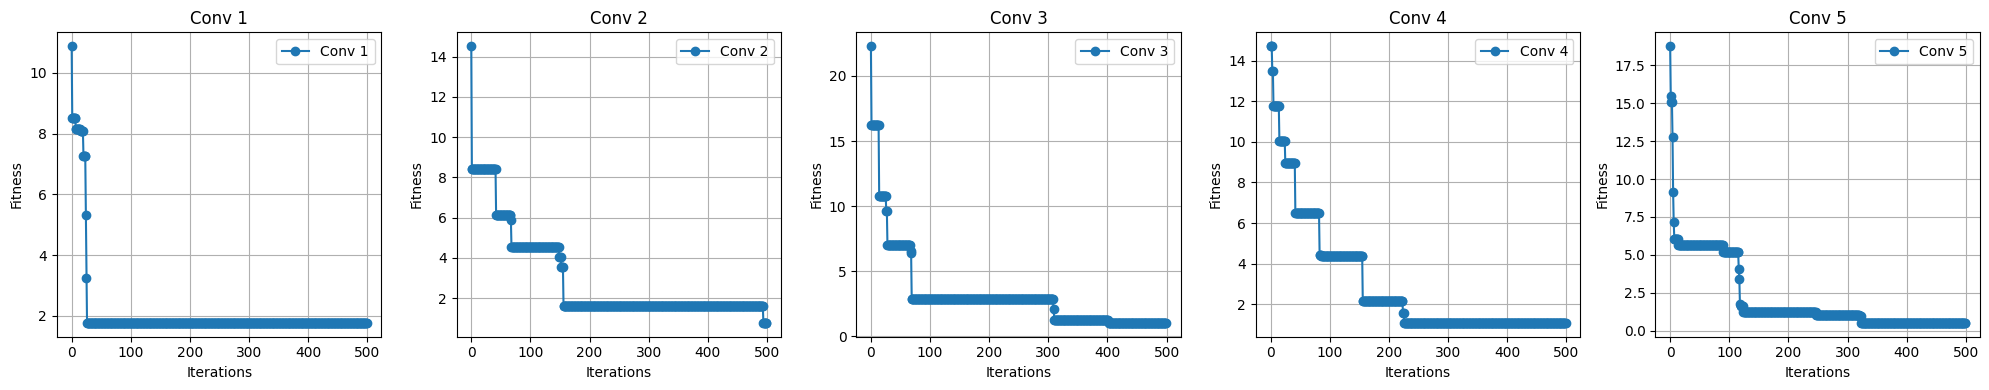

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))  # Adjust width and height as needed

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.plot(convfull[i], marker='o', label=f'Conv {i + 1}')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title(f'Conv {i + 1}')
    plt.grid(True)
    plt.tight_layout()  # Prevent overlap
    plt.legend()

plt.show()

Example:- Basic quadratic function nearly optimized in 10 iterations

In [ ]:
import numpy as np

def objective_function(x):
    return x[0]**2 + 3 * x[0] + 2

orso = OliveRidleySurvivalOptimizer(
    objective_function=objective_function,
    num_turtles=30,
    dimensions=1,
    lower_bound=-10,
    upper_bound=10,
    max_iterations=10
)

best_x, best_fitness,convergence = orso.optimize()
print(f"Minimum value of the function is {best_fitness} at x = {best_x[0]}")


Minimum value of the function is -0.24828858327349046 at x = -1.5413692727336383
